In [25]:
# !pip install scikit-learn
# !pip install pandas
# !pip install emoji
# !pip install num2words
# !pip install nltk
# !pip install matplotlib
# !pip install wordcloud

In [26]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import emoji
from num2words import num2words
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
#nltk.download('stopwords')
#nltk.download('wordnet')
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
from matplotlib import colors
from wordcloud import WordCloud
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('vader_lexicon') #descarca dictionarul Vader

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Andreea\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
#!pip install ipynb 
from ipynb.fs.full.preprocessor_class import Preprocessor

In [28]:
train_data = pd.read_csv('data/shuffled_train_data.csv',index_col=None)
train_labels = pd.read_csv('data/shuffled_train_labels.csv',index_col=None)

test_data = pd.read_csv('data/test_data.csv',index_col=None)
test_labels = pd.read_csv('data/test_labels.csv',index_col=None)

train_data_plot = pd.read_csv('data/train_data_plot.csv',index_col=None)
test_data_plot = pd.read_csv('data/test_data_plot.csv',index_col=None)

train_data.shape

(45000, 1)

In [29]:
preprocessor = Preprocessor(set(stopwords.words('english')), WordNetLemmatizer(), PorterStemmer(), True, True, True, True, True, False, True, True, True, False)

preprocessed_data_train = pd.DataFrame(columns=['text'])
preprocessed_data_test = pd.DataFrame(columns=['text'])

preprocessed_data_train['text'] = train_data.apply(lambda row: preprocessor.preprocess(row.iloc[0]), axis = 1)

preprocessed_data_test['text'] = test_data.apply(lambda row: preprocessor.preprocess(row.iloc[0]), axis = 1)

In [30]:
preprocessed_data_test['text'] = preprocessed_data_test['text'].apply(lambda x: ' '.join(map(str, x)))
preprocessed_data_test

,text
0,shoe simply hurt foot sorry already worn other...
1,run small fit size range claim least case retu...
2,almost year old wear size brand however tank f...
3,huge heavy shoe felt like giant hunk plastic f...
4,lost flower one nd week wear still wear though...
...,...
5995,got dress semi dressy dress wedding looked gre...
5996,really awesome like
5997,sizing chart right money get pay shirt flimsy ...
5998,many compliment


In [31]:
preprocessed_data_train['text'] = preprocessed_data_train['text'].apply(lambda x: ' '.join(map(str, x)))
preprocessed_data_train

,text
0,want something cheap give away last
1,look cute outside wore twice vega issue year l...
2,think sending back zipper stick one already co...
3,usually wear birkenstock made woman guess made...
4,excited today arrived home package door opened...
...,...
44995,worn bali bra year last comfortable good price
44996,soft cool beautiful color little snug
44997,product look exactly like picture impressed du...
44998,granddaughter age loved getting birthstone rin...


In [32]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [33]:
vader_model = SentimentIntensityAnalyzer()

In [34]:
vader_model.polarity_scores("I am sad")

{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}

In [35]:
rezultate_vader = [vader_model.polarity_scores(text) for text in preprocessed_data_test['text']]
rezultate_vader[:5]

[{'neg': 0.496, 'neu': 0.504, 'pos': 0.0, 'compound': -0.7096},
 {'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.3612},
 {'neg': 0.069, 'neu': 0.726, 'pos': 0.205, 'compound': 0.3182},
 {'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.7351},
 {'neg': 0.204, 'neu': 0.796, 'pos': 0.0, 'compound': -0.3182}]

In [37]:
predictions = []
for rez in rezultate_vader:
    if rez['compound'] >= 0.3:
        predictions.append('positive')
    elif rez['compound'] <= -0.3:
        predictions.append('negative')
    else:
        predictions.append('neutral')
print(predictions[100:120])

['neutral', 'positive', 'positive', 'negative', 'positive', 'negative', 'neutral', 'neutral', 'positive', 'negative', 'positive', 'positive', 'positive', 'neutral', 'positive', 'positive', 'positive', 'positive', 'positive', 'neutral']


In [38]:
acc = metrics.accuracy_score(test_labels['label'], predictions)

In [39]:
acc

0.46366666666666667

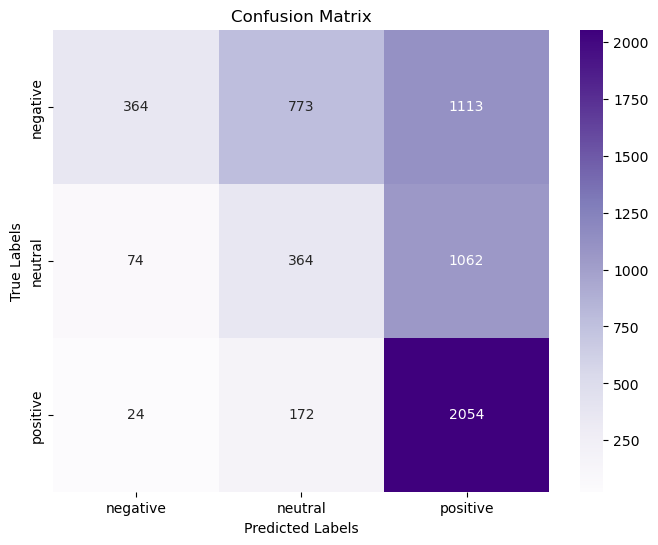

In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_labels['label'], predictions)

plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Purples', xticklabels = ['negative', 'neutral', 'positive'], yticklabels = ['negative', 'neutral', 'positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [41]:
from sklearn.metrics import classification_report

print(classification_report(test_labels['label'], predictions))

              precision    recall  f1-score   support

    negative       0.79      0.16      0.27      2250
     neutral       0.28      0.24      0.26      1500
    positive       0.49      0.91      0.63      2250

    accuracy                           0.46      6000
   macro avg       0.52      0.44      0.39      6000
weighted avg       0.55      0.46      0.40      6000

